In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import yfinance as yf
import pandas as pd
      
# Download data for all tickers
tickers = ['TSLA']
ticker_data = yf.download(tickers, start='2010-01-01')  


[*********************100%%**********************]  1 of 1 completed


(array([ 0.03096618,  0.03096618,  0.03096618,  0.        ,  0.03096618,
         0.06193237,  0.03096618,  0.09289855,  0.09289855,  0.21676328,
         0.12386473,  0.12386473,  0.15483092,  0.46449275,  0.68125603,
         1.14574877,  1.14574877,  2.41536228,  3.56111105,  5.20231875,
         7.74154577, 10.77623171, 15.730821  , 16.44304321, 12.44840559,
        10.62140079,  6.84352646,  4.49009654,  3.03468594,  1.54830915,
         1.20768114,  0.92898549,  0.5573913 ,  0.46449275,  0.30966183,
         0.24772946,  0.06193237,  0.1857971 ,  0.24772946,  0.        ,
         0.12386473,  0.12386473,  0.06193237,  0.03096618,  0.06193237,
         0.03096618,  0.        ,  0.        ,  0.        ,  0.03096618]),
 array([-0.21062824, -0.20153666, -0.19244508, -0.1833535 , -0.17426192,
        -0.16517034, -0.15607876, -0.14698718, -0.1378956 , -0.12880402,
        -0.11971244, -0.11062086, -0.10152928, -0.0924377 , -0.08334612,
        -0.07425454, -0.06516296, -0.05607138, -0

Text(0.5, 0, 'Daily return')

Text(0.5, 1.0, 'Histogram of daily returns of TSLA')

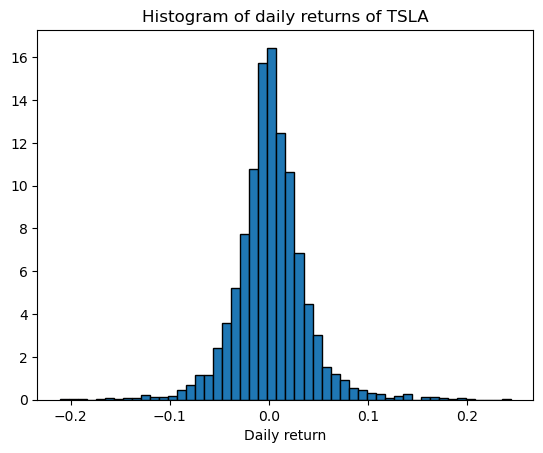

In [2]:
# calculate daily returns of TSLA
ret_TSLA = ticker_data['Adj Close'].pct_change(fill_method=None)

# plot histogram of daily returns of TSLA
from matplotlib import pyplot as plt
fig = plt.figure()
axs = fig.add_subplot()

# We can set the number of bins with the *bins* keyword argument.
axs.hist(ret_TSLA, bins = 50, density = 'true', edgecolor = "black")
plt.xlabel("Daily return")
plt.title("Histogram of daily returns of TSLA")

plt.savefig('TSLA_hist.png')


(array([ 0.06270917,  0.        ,  0.        ,  0.06270917,  0.        ,
         0.06270917,  0.        ,  0.        ,  0.06270917,  0.        ,
         0.06270917,  0.06270917,  0.        ,  0.06270917,  0.12541834,
         0.06270917,  0.12541834,  0.06270917,  0.12541834,  0.25083668,
         0.12541834,  0.12541834,  0.        ,  0.25083668,  0.18812751,
         0.12541834,  0.56438252,  0.31354584,  0.62709169,  0.75251003,
         1.06605587,  1.19147421,  1.12876504,  1.19147421,  1.88127507,
         3.01004011,  2.69649426,  4.20151432,  4.26422349,  6.20820772,
         6.89800858,  8.59115614, 10.2843037 , 11.35035957, 13.98414466,
        17.68398563, 17.80940397, 15.1129097 , 12.91808879, 12.1028696 ,
        12.66725212,  8.65386531,  8.40302863,  5.26757019,  4.95402434,
         3.88796847,  3.44900429,  2.50836676,  1.37960172,  1.63043839,
         1.63043839,  0.75251003,  1.25418338,  0.62709169,  0.62709169,
         0.50167335,  0.43896418,  0.50167335,  0.3

Text(0.5, 0, 'Daily return')

Text(0.5, 1.0, 'Histogram of daily returns of TSLA')

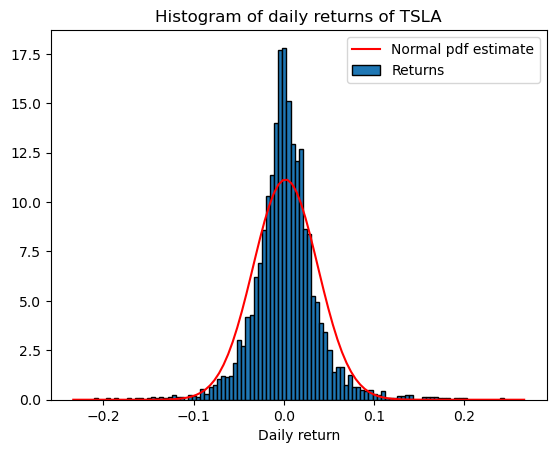

In [52]:
# superimpose a fitted Normal distribution
from scipy.stats import norm

fig = plt.figure()
axs = fig.add_subplot()
# We can set the number of bins with the *bins* keyword argument.
axs.hist(ret_TSLA, bins = 100, density = 'true', edgecolor = "black")
plt.xlabel("Daily return")
plt.title("Histogram of daily returns of TSLA")

# Calculate the mean and standard deviation
mu, std = norm.fit(ret_TSLA.dropna(), )

# Plot the normal density estimate
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=1.5)

plt.legend(['Normal pdf estimate', 'Returns'])
plt.savefig('TSLA_hist_density.png')

(array([ 0.06270917,  0.        ,  0.        ,  0.06270917,  0.        ,
         0.06270917,  0.        ,  0.        ,  0.06270917,  0.        ,
         0.06270917,  0.06270917,  0.        ,  0.06270917,  0.12541834,
         0.06270917,  0.12541834,  0.06270917,  0.12541834,  0.25083668,
         0.12541834,  0.12541834,  0.        ,  0.25083668,  0.18812751,
         0.12541834,  0.56438252,  0.31354584,  0.62709169,  0.75251003,
         1.06605587,  1.19147421,  1.12876504,  1.19147421,  1.88127507,
         3.01004011,  2.69649426,  4.20151432,  4.26422349,  6.20820772,
         6.89800858,  8.59115614, 10.2843037 , 11.35035957, 13.98414466,
        17.68398563, 17.80940397, 15.1129097 , 12.91808879, 12.1028696 ,
        12.66725212,  8.65386531,  8.40302863,  5.26757019,  4.95402434,
         3.88796847,  3.44900429,  2.50836676,  1.37960172,  1.63043839,
         1.63043839,  0.75251003,  1.25418338,  0.62709169,  0.62709169,
         0.50167335,  0.43896418,  0.50167335,  0.3

Text(0.5, 0, 'Daily return')

Text(0.5, 1.0, 'Histogram of daily returns of TSLA')

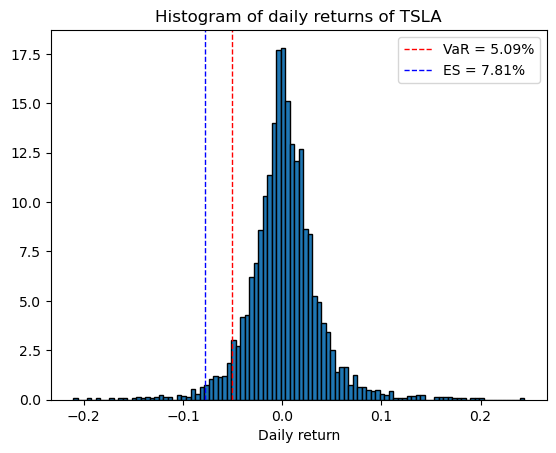

In [53]:
# calculate a simple historical VaR
hist_VaR = ret_TSLA.quantile(0.05)

# calculate expected shortfall
ES = ret_TSLA[ret_TSLA <= hist_VaR].mean()

# plot histogram again and add lines for VaR and ES
fig = plt.figure()
axs = fig.add_subplot()
# We can set the number of bins with the *bins* keyword argument.
axs.hist(ret_TSLA, bins = 100, density = 'true', edgecolor = "black")
plt.xlabel("Daily return")
plt.title("Histogram of daily returns of TSLA")

plt.axvline(hist_VaR, color='r', linestyle='--', linewidth=1, label='VaR = {:.2%}'.format(-hist_VaR))
plt.axvline(ES, color='b', linestyle='--', linewidth=1, label='ES = {:.2%}'.format(-ES))

plt.legend()
plt.savefig('TSLA_hist_VaR.png')
